# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

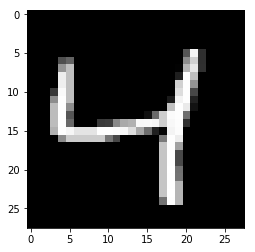

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [23]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

# Input and target placeholders
inputs_  = tf.placeholder(tf.float32, shape=(None, 784))
targets_ = tf.placeholder(tf.float32, shape=(None, 784))

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, 784)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits)

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer().minimize(cost)

## Training

In [24]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [25]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6929
Epoch: 1/20... Training loss: 0.6895
Epoch: 1/20... Training loss: 0.6856
Epoch: 1/20... Training loss: 0.6814
Epoch: 1/20... Training loss: 0.6762
Epoch: 1/20... Training loss: 0.6704
Epoch: 1/20... Training loss: 0.6618
Epoch: 1/20... Training loss: 0.6524
Epoch: 1/20... Training loss: 0.6431
Epoch: 1/20... Training loss: 0.6321
Epoch: 1/20... Training loss: 0.6171
Epoch: 1/20... Training loss: 0.6017
Epoch: 1/20... Training loss: 0.5906
Epoch: 1/20... Training loss: 0.5733
Epoch: 1/20... Training loss: 0.5566
Epoch: 1/20... Training loss: 0.5364
Epoch: 1/20... Training loss: 0.5202
Epoch: 1/20... Training loss: 0.4969
Epoch: 1/20... Training loss: 0.4801
Epoch: 1/20... Training loss: 0.4629
Epoch: 1/20... Training loss: 0.4473
Epoch: 1/20... Training loss: 0.4343
Epoch: 1/20... Training loss: 0.4179
Epoch: 1/20... Training loss: 0.4017
Epoch: 1/20... Training loss: 0.3825
Epoch: 1/20... Training loss: 0.3720
Epoch: 1/20... Training loss: 0.3663
E

Epoch: 1/20... Training loss: 0.1959
Epoch: 1/20... Training loss: 0.1933
Epoch: 1/20... Training loss: 0.1904
Epoch: 1/20... Training loss: 0.1901
Epoch: 1/20... Training loss: 0.2010
Epoch: 1/20... Training loss: 0.1945
Epoch: 1/20... Training loss: 0.1956
Epoch: 1/20... Training loss: 0.1965
Epoch: 1/20... Training loss: 0.1971
Epoch: 1/20... Training loss: 0.1912
Epoch: 1/20... Training loss: 0.1971
Epoch: 1/20... Training loss: 0.1921
Epoch: 1/20... Training loss: 0.1905
Epoch: 1/20... Training loss: 0.1950
Epoch: 1/20... Training loss: 0.1974
Epoch: 1/20... Training loss: 0.1920
Epoch: 1/20... Training loss: 0.1890
Epoch: 1/20... Training loss: 0.1936
Epoch: 1/20... Training loss: 0.1888
Epoch: 1/20... Training loss: 0.1847
Epoch: 1/20... Training loss: 0.1843
Epoch: 1/20... Training loss: 0.1908
Epoch: 1/20... Training loss: 0.1974
Epoch: 1/20... Training loss: 0.1894
Epoch: 1/20... Training loss: 0.1953
Epoch: 1/20... Training loss: 0.1890
Epoch: 1/20... Training loss: 0.1925
E

Epoch: 2/20... Training loss: 0.1630
Epoch: 2/20... Training loss: 0.1531
Epoch: 2/20... Training loss: 0.1568
Epoch: 2/20... Training loss: 0.1604
Epoch: 2/20... Training loss: 0.1595
Epoch: 2/20... Training loss: 0.1600
Epoch: 2/20... Training loss: 0.1570
Epoch: 2/20... Training loss: 0.1556
Epoch: 2/20... Training loss: 0.1586
Epoch: 2/20... Training loss: 0.1556
Epoch: 2/20... Training loss: 0.1618
Epoch: 2/20... Training loss: 0.1572
Epoch: 2/20... Training loss: 0.1627
Epoch: 2/20... Training loss: 0.1557
Epoch: 2/20... Training loss: 0.1593
Epoch: 2/20... Training loss: 0.1551
Epoch: 2/20... Training loss: 0.1552
Epoch: 2/20... Training loss: 0.1589
Epoch: 2/20... Training loss: 0.1551
Epoch: 2/20... Training loss: 0.1536
Epoch: 2/20... Training loss: 0.1553
Epoch: 2/20... Training loss: 0.1576
Epoch: 2/20... Training loss: 0.1578
Epoch: 2/20... Training loss: 0.1544
Epoch: 2/20... Training loss: 0.1597
Epoch: 2/20... Training loss: 0.1611
Epoch: 2/20... Training loss: 0.1537
E

Epoch: 3/20... Training loss: 0.1423
Epoch: 3/20... Training loss: 0.1462
Epoch: 3/20... Training loss: 0.1395
Epoch: 3/20... Training loss: 0.1369
Epoch: 3/20... Training loss: 0.1389
Epoch: 3/20... Training loss: 0.1365
Epoch: 3/20... Training loss: 0.1326
Epoch: 3/20... Training loss: 0.1340
Epoch: 3/20... Training loss: 0.1341
Epoch: 3/20... Training loss: 0.1358
Epoch: 3/20... Training loss: 0.1377
Epoch: 3/20... Training loss: 0.1358
Epoch: 3/20... Training loss: 0.1363
Epoch: 3/20... Training loss: 0.1311
Epoch: 3/20... Training loss: 0.1364
Epoch: 3/20... Training loss: 0.1354
Epoch: 3/20... Training loss: 0.1372
Epoch: 3/20... Training loss: 0.1330
Epoch: 3/20... Training loss: 0.1331
Epoch: 3/20... Training loss: 0.1405
Epoch: 3/20... Training loss: 0.1374
Epoch: 3/20... Training loss: 0.1460
Epoch: 3/20... Training loss: 0.1357
Epoch: 3/20... Training loss: 0.1339
Epoch: 3/20... Training loss: 0.1344
Epoch: 3/20... Training loss: 0.1348
Epoch: 3/20... Training loss: 0.1353
E

Epoch: 4/20... Training loss: 0.1241
Epoch: 4/20... Training loss: 0.1245
Epoch: 4/20... Training loss: 0.1221
Epoch: 4/20... Training loss: 0.1228
Epoch: 4/20... Training loss: 0.1256
Epoch: 4/20... Training loss: 0.1254
Epoch: 4/20... Training loss: 0.1232
Epoch: 4/20... Training loss: 0.1245
Epoch: 4/20... Training loss: 0.1264
Epoch: 4/20... Training loss: 0.1264
Epoch: 4/20... Training loss: 0.1260
Epoch: 4/20... Training loss: 0.1251
Epoch: 4/20... Training loss: 0.1255
Epoch: 4/20... Training loss: 0.1259
Epoch: 4/20... Training loss: 0.1243
Epoch: 4/20... Training loss: 0.1237
Epoch: 4/20... Training loss: 0.1251
Epoch: 4/20... Training loss: 0.1255
Epoch: 4/20... Training loss: 0.1318
Epoch: 4/20... Training loss: 0.1265
Epoch: 4/20... Training loss: 0.1175
Epoch: 4/20... Training loss: 0.1220
Epoch: 4/20... Training loss: 0.1211
Epoch: 4/20... Training loss: 0.1225
Epoch: 4/20... Training loss: 0.1196
Epoch: 4/20... Training loss: 0.1238
Epoch: 4/20... Training loss: 0.1268
E

Epoch: 4/20... Training loss: 0.1163
Epoch: 4/20... Training loss: 0.1163
Epoch: 4/20... Training loss: 0.1169
Epoch: 5/20... Training loss: 0.1197
Epoch: 5/20... Training loss: 0.1139
Epoch: 5/20... Training loss: 0.1185
Epoch: 5/20... Training loss: 0.1180
Epoch: 5/20... Training loss: 0.1149
Epoch: 5/20... Training loss: 0.1156
Epoch: 5/20... Training loss: 0.1167
Epoch: 5/20... Training loss: 0.1168
Epoch: 5/20... Training loss: 0.1143
Epoch: 5/20... Training loss: 0.1124
Epoch: 5/20... Training loss: 0.1134
Epoch: 5/20... Training loss: 0.1181
Epoch: 5/20... Training loss: 0.1139
Epoch: 5/20... Training loss: 0.1175
Epoch: 5/20... Training loss: 0.1156
Epoch: 5/20... Training loss: 0.1183
Epoch: 5/20... Training loss: 0.1152
Epoch: 5/20... Training loss: 0.1167
Epoch: 5/20... Training loss: 0.1126
Epoch: 5/20... Training loss: 0.1153
Epoch: 5/20... Training loss: 0.1159
Epoch: 5/20... Training loss: 0.1155
Epoch: 5/20... Training loss: 0.1134
Epoch: 5/20... Training loss: 0.1122
E

Epoch: 5/20... Training loss: 0.1065
Epoch: 5/20... Training loss: 0.1106
Epoch: 5/20... Training loss: 0.1088
Epoch: 5/20... Training loss: 0.1074
Epoch: 5/20... Training loss: 0.1109
Epoch: 5/20... Training loss: 0.1084
Epoch: 5/20... Training loss: 0.1109
Epoch: 5/20... Training loss: 0.1038
Epoch: 5/20... Training loss: 0.1137
Epoch: 5/20... Training loss: 0.1087
Epoch: 5/20... Training loss: 0.1076
Epoch: 5/20... Training loss: 0.1058
Epoch: 5/20... Training loss: 0.1049
Epoch: 5/20... Training loss: 0.1121
Epoch: 5/20... Training loss: 0.1092
Epoch: 5/20... Training loss: 0.1067
Epoch: 5/20... Training loss: 0.1109
Epoch: 5/20... Training loss: 0.1076
Epoch: 5/20... Training loss: 0.1061
Epoch: 5/20... Training loss: 0.1082
Epoch: 5/20... Training loss: 0.1137
Epoch: 5/20... Training loss: 0.1062
Epoch: 5/20... Training loss: 0.1105
Epoch: 5/20... Training loss: 0.1055
Epoch: 5/20... Training loss: 0.1121
Epoch: 5/20... Training loss: 0.1086
Epoch: 5/20... Training loss: 0.1104
E

Epoch: 6/20... Training loss: 0.1014
Epoch: 6/20... Training loss: 0.1083
Epoch: 6/20... Training loss: 0.1034
Epoch: 6/20... Training loss: 0.1058
Epoch: 6/20... Training loss: 0.1066
Epoch: 6/20... Training loss: 0.1063
Epoch: 6/20... Training loss: 0.1024
Epoch: 6/20... Training loss: 0.1057
Epoch: 6/20... Training loss: 0.1016
Epoch: 6/20... Training loss: 0.1056
Epoch: 6/20... Training loss: 0.1019
Epoch: 6/20... Training loss: 0.1030
Epoch: 6/20... Training loss: 0.1078
Epoch: 6/20... Training loss: 0.1045
Epoch: 6/20... Training loss: 0.1047
Epoch: 6/20... Training loss: 0.1035
Epoch: 6/20... Training loss: 0.1019
Epoch: 6/20... Training loss: 0.1075
Epoch: 6/20... Training loss: 0.1028
Epoch: 6/20... Training loss: 0.1042
Epoch: 6/20... Training loss: 0.1045
Epoch: 6/20... Training loss: 0.1017
Epoch: 6/20... Training loss: 0.1073
Epoch: 6/20... Training loss: 0.1045
Epoch: 6/20... Training loss: 0.1038
Epoch: 6/20... Training loss: 0.1052
Epoch: 6/20... Training loss: 0.1035
E

Epoch: 7/20... Training loss: 0.1032
Epoch: 7/20... Training loss: 0.0998
Epoch: 7/20... Training loss: 0.1030
Epoch: 7/20... Training loss: 0.1055
Epoch: 7/20... Training loss: 0.0989
Epoch: 7/20... Training loss: 0.0999
Epoch: 7/20... Training loss: 0.1020
Epoch: 7/20... Training loss: 0.0989
Epoch: 7/20... Training loss: 0.0977
Epoch: 7/20... Training loss: 0.0997
Epoch: 7/20... Training loss: 0.0973
Epoch: 7/20... Training loss: 0.0989
Epoch: 7/20... Training loss: 0.0983
Epoch: 7/20... Training loss: 0.1018
Epoch: 7/20... Training loss: 0.1041
Epoch: 7/20... Training loss: 0.0992
Epoch: 7/20... Training loss: 0.1030
Epoch: 7/20... Training loss: 0.1012
Epoch: 7/20... Training loss: 0.1002
Epoch: 7/20... Training loss: 0.1018
Epoch: 7/20... Training loss: 0.1026
Epoch: 7/20... Training loss: 0.1024
Epoch: 7/20... Training loss: 0.0978
Epoch: 7/20... Training loss: 0.1006
Epoch: 7/20... Training loss: 0.1032
Epoch: 7/20... Training loss: 0.0979
Epoch: 7/20... Training loss: 0.0968
E

Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.0966
Epoch: 8/20... Training loss: 0.0995
Epoch: 8/20... Training loss: 0.0995
Epoch: 8/20... Training loss: 0.0994
Epoch: 8/20... Training loss: 0.0961
Epoch: 8/20... Training loss: 0.1014
Epoch: 8/20... Training loss: 0.0946
Epoch: 8/20... Training loss: 0.0959
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.0978
Epoch: 8/20... Training loss: 0.0978
Epoch: 8/20... Training loss: 0.1027
Epoch: 8/20... Training loss: 0.1015
Epoch: 8/20... Training loss: 0.0989
Epoch: 8/20... Training loss: 0.0960
Epoch: 8/20... Training loss: 0.0986
Epoch: 8/20... Training loss: 0.1020
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.1000
Epoch: 8/20... Training loss: 0.0984
Epoch: 8/20... Training loss: 0.0981
Epoch: 8/20... Training loss: 0.1005
Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.0984
Epoch: 8/20... Training loss: 0.0982
Epoch: 8/20... Training loss: 0.0989
E

Epoch: 9/20... Training loss: 0.0984
Epoch: 9/20... Training loss: 0.0981
Epoch: 9/20... Training loss: 0.0977
Epoch: 9/20... Training loss: 0.0997
Epoch: 9/20... Training loss: 0.0990
Epoch: 9/20... Training loss: 0.0990
Epoch: 9/20... Training loss: 0.0981
Epoch: 9/20... Training loss: 0.1005
Epoch: 9/20... Training loss: 0.0989
Epoch: 9/20... Training loss: 0.0940
Epoch: 9/20... Training loss: 0.0977
Epoch: 9/20... Training loss: 0.0967
Epoch: 9/20... Training loss: 0.0979
Epoch: 9/20... Training loss: 0.0946
Epoch: 9/20... Training loss: 0.0987
Epoch: 9/20... Training loss: 0.0986
Epoch: 9/20... Training loss: 0.0968
Epoch: 9/20... Training loss: 0.0996
Epoch: 9/20... Training loss: 0.0973
Epoch: 9/20... Training loss: 0.0961
Epoch: 9/20... Training loss: 0.0960
Epoch: 9/20... Training loss: 0.0928
Epoch: 9/20... Training loss: 0.0958
Epoch: 9/20... Training loss: 0.0961
Epoch: 9/20... Training loss: 0.0992
Epoch: 9/20... Training loss: 0.0966
Epoch: 9/20... Training loss: 0.0976
E

Epoch: 9/20... Training loss: 0.0960
Epoch: 9/20... Training loss: 0.0973
Epoch: 10/20... Training loss: 0.0981
Epoch: 10/20... Training loss: 0.0969
Epoch: 10/20... Training loss: 0.0984
Epoch: 10/20... Training loss: 0.0953
Epoch: 10/20... Training loss: 0.0937
Epoch: 10/20... Training loss: 0.0951
Epoch: 10/20... Training loss: 0.0930
Epoch: 10/20... Training loss: 0.0987
Epoch: 10/20... Training loss: 0.0945
Epoch: 10/20... Training loss: 0.0953
Epoch: 10/20... Training loss: 0.0971
Epoch: 10/20... Training loss: 0.0959
Epoch: 10/20... Training loss: 0.0958
Epoch: 10/20... Training loss: 0.0927
Epoch: 10/20... Training loss: 0.0964
Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20... Training loss: 0.0946
Epoch: 10/20... Training loss: 0.0998
Epoch: 10/20... Training loss: 0.0955
Epoch: 10/20... Training loss: 0.0985
Epoch: 10/20... Training loss: 0.0934
Epoch: 10/20... Training loss: 0.0958
Epoch: 10/20... Training loss: 0.0933
Epoch: 10/20... Training loss: 0.0943
Epoch: 10/20..

Epoch: 10/20... Training loss: 0.0958
Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20... Training loss: 0.0942
Epoch: 10/20... Training loss: 0.0939
Epoch: 10/20... Training loss: 0.0972
Epoch: 10/20... Training loss: 0.0967
Epoch: 10/20... Training loss: 0.0943
Epoch: 10/20... Training loss: 0.0955
Epoch: 10/20... Training loss: 0.0982
Epoch: 10/20... Training loss: 0.0981
Epoch: 10/20... Training loss: 0.0950
Epoch: 10/20... Training loss: 0.0959
Epoch: 10/20... Training loss: 0.0955
Epoch: 10/20... Training loss: 0.0954
Epoch: 10/20... Training loss: 0.0963
Epoch: 10/20... Training loss: 0.0973
Epoch: 10/20... Training loss: 0.0934
Epoch: 10/20... Training loss: 0.0969
Epoch: 10/20... Training loss: 0.0951
Epoch: 10/20... Training loss: 0.0972
Epoch: 10/20... Training loss: 0.0932
Epoch: 10/20... Training loss: 0.0979
Epoch: 10/20... Training loss: 0.0943
Epoch: 10/20... Training loss: 0.0950
Epoch: 10/20... Training loss: 0.0946
Epoch: 10/20... Training loss: 0.0934
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0976
Epoch: 11/20... Training loss: 0.0970
Epoch: 11/20... Training loss: 0.0935
Epoch: 11/20... Training loss: 0.0969
Epoch: 11/20... Training loss: 0.0943
Epoch: 11/20... Training loss: 0.0979
Epoch: 11/20... Training loss: 0.0948
Epoch: 11/20... Training loss: 0.0988
Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20... Training loss: 0.0953
Epoch: 11/20... Training loss: 0.0932
Epoch: 11/20... Training loss: 0.0929
Epoch: 11/20... Training loss: 0.0960
Epoch: 11/20... Training loss: 0.0948
Epoch: 11/20... Training loss: 0.0916
Epoch: 11/20... Training loss: 0.0970
Epoch: 11/20... Training loss: 0.0975
Epoch: 11/20... Training loss: 0.0960
Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20... Training loss: 0.0956
Epoch: 11/20... Training loss: 0.0908
Epoch: 11/20... Training loss: 0.0945
Epoch: 11/20... Training loss: 0.0941
Epoch: 11/20... Training loss: 0.0934
Epoch: 11/20... Training loss: 0.0923
Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0956
Epoch: 12/20... Training loss: 0.0924
Epoch: 12/20... Training loss: 0.0932
Epoch: 12/20... Training loss: 0.0954
Epoch: 12/20... Training loss: 0.0962
Epoch: 12/20... Training loss: 0.0936
Epoch: 12/20... Training loss: 0.0966
Epoch: 12/20... Training loss: 0.0937
Epoch: 12/20... Training loss: 0.0942
Epoch: 12/20... Training loss: 0.0902
Epoch: 12/20... Training loss: 0.0980
Epoch: 12/20... Training loss: 0.0960
Epoch: 12/20... Training loss: 0.0930
Epoch: 12/20... Training loss: 0.0972
Epoch: 12/20... Training loss: 0.0943
Epoch: 12/20... Training loss: 0.0918
Epoch: 12/20... Training loss: 0.0924
Epoch: 12/20... Training loss: 0.0944
Epoch: 12/20... Training loss: 0.0933
Epoch: 12/20... Training loss: 0.0938
Epoch: 12/20... Training loss: 0.0931
Epoch: 12/20... Training loss: 0.0955
Epoch: 12/20... Training loss: 0.0944
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0955
Epoch: 12/20... Training loss: 0.0903
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0962
Epoch: 13/20... Training loss: 0.0943
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20... Training loss: 0.0953
Epoch: 13/20... Training loss: 0.0922
Epoch: 13/20... Training loss: 0.0928
Epoch: 13/20... Training loss: 0.0934
Epoch: 13/20... Training loss: 0.0987
Epoch: 13/20... Training loss: 0.0949
Epoch: 13/20... Training loss: 0.0928
Epoch: 13/20... Training loss: 0.0970
Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20... Training loss: 0.0948
Epoch: 13/20... Training loss: 0.0941
Epoch: 13/20... Training loss: 0.0926
Epoch: 13/20... Training loss: 0.0972
Epoch: 13/20... Training loss: 0.0977
Epoch: 13/20... Training loss: 0.0975
Epoch: 13/20... Training loss: 0.0970
Epoch: 13/20... Training loss: 0.0902
Epoch: 13/20... Training loss: 0.0941
Epoch: 13/20... Training loss: 0.0940
Epoch: 13/20... Training loss: 0.0927
Epoch: 13/20... Training loss: 0.0946
Epoch: 13/20... Training loss: 0.0931
Epoch: 13/20... Training loss: 0.0930
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0929
Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20... Training loss: 0.0947
Epoch: 14/20... Training loss: 0.0966
Epoch: 14/20... Training loss: 0.0979
Epoch: 14/20... Training loss: 0.0955
Epoch: 14/20... Training loss: 0.0947
Epoch: 14/20... Training loss: 0.0956
Epoch: 14/20... Training loss: 0.0944
Epoch: 14/20... Training loss: 0.0981
Epoch: 14/20... Training loss: 0.0938
Epoch: 14/20... Training loss: 0.0967
Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20... Training loss: 0.0953
Epoch: 14/20... Training loss: 0.0942
Epoch: 14/20... Training loss: 0.0961
Epoch: 14/20... Training loss: 0.0974
Epoch: 14/20... Training loss: 0.0906
Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20... Training loss: 0.0948
Epoch: 14/20... Training loss: 0.0927
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0936
Epoch: 14/20... Training loss: 0.0966
Epoch: 14/20... Training loss: 0.0970
Epoch: 14/20... Training loss: 0.0909
Epoch: 14/20

Epoch: 14/20... Training loss: 0.0967
Epoch: 14/20... Training loss: 0.0915
Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20... Training loss: 0.0952
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0947
Epoch: 14/20... Training loss: 0.0936
Epoch: 14/20... Training loss: 0.0948
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0948
Epoch: 14/20... Training loss: 0.0953
Epoch: 14/20... Training loss: 0.0951
Epoch: 14/20... Training loss: 0.0964
Epoch: 14/20... Training loss: 0.0937
Epoch: 14/20... Training loss: 0.0989
Epoch: 14/20... Training loss: 0.0909
Epoch: 14/20... Training loss: 0.0909
Epoch: 14/20... Training loss: 0.0951
Epoch: 14/20... Training loss: 0.0894
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0947
Epoch: 14/20... Training loss: 0.0980
Epoch: 14/20... Training loss: 0.0911
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20... Training loss: 0.0977
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0906
Epoch: 15/20... Training loss: 0.0934
Epoch: 15/20... Training loss: 0.0941
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0952
Epoch: 15/20... Training loss: 0.0969
Epoch: 15/20... Training loss: 0.0974
Epoch: 15/20... Training loss: 0.0973
Epoch: 15/20... Training loss: 0.0919
Epoch: 15/20... Training loss: 0.0942
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0915
Epoch: 15/20... Training loss: 0.0923
Epoch: 15/20... Training loss: 0.0945
Epoch: 15/20... Training loss: 0.0952
Epoch: 15/20... Training loss: 0.0930
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0943
Epoch: 15/20... Training loss: 0.0936
Epoch: 15/20... Training loss: 0.0934
Epoch: 15/20... Training loss: 0.0959
Epoch: 15/20... Training loss: 0.0923
Epoch: 15/20... Training loss: 0.0950
Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20... Training loss: 0.0924
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0927
Epoch: 16/20... Training loss: 0.0938
Epoch: 16/20... Training loss: 0.0943
Epoch: 16/20... Training loss: 0.0953
Epoch: 16/20... Training loss: 0.0918
Epoch: 16/20... Training loss: 0.0947
Epoch: 16/20... Training loss: 0.0953
Epoch: 16/20... Training loss: 0.0928
Epoch: 16/20... Training loss: 0.0949
Epoch: 16/20... Training loss: 0.0947
Epoch: 16/20... Training loss: 0.0912
Epoch: 16/20... Training loss: 0.0961
Epoch: 16/20... Training loss: 0.0937
Epoch: 16/20... Training loss: 0.0934
Epoch: 16/20... Training loss: 0.0936
Epoch: 16/20... Training loss: 0.0927
Epoch: 16/20... Training loss: 0.0906
Epoch: 16/20... Training loss: 0.0958
Epoch: 16/20... Training loss: 0.0973
Epoch: 16/20... Training loss: 0.0940
Epoch: 16/20... Training loss: 0.0905
Epoch: 16/20... Training loss: 0.0932
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20... Training loss: 0.0973
Epoch: 16/20... Training loss: 0.0950
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0928
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0946
Epoch: 17/20... Training loss: 0.0924
Epoch: 17/20... Training loss: 0.0963
Epoch: 17/20... Training loss: 0.0949
Epoch: 17/20... Training loss: 0.0951
Epoch: 17/20... Training loss: 0.0946
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0933
Epoch: 17/20... Training loss: 0.0918
Epoch: 17/20... Training loss: 0.0942
Epoch: 17/20... Training loss: 0.0904
Epoch: 17/20... Training loss: 0.0940
Epoch: 17/20... Training loss: 0.0940
Epoch: 17/20... Training loss: 0.0943
Epoch: 17/20... Training loss: 0.0922
Epoch: 17/20... Training loss: 0.0943
Epoch: 17/20... Training loss: 0.0961
Epoch: 17/20... Training loss: 0.0957
Epoch: 17/20... Training loss: 0.0915
Epoch: 17/20... Training loss: 0.0940
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0972
Epoch: 17/20... Training loss: 0.0951
Epoch: 17/20... Training loss: 0.0937
Epoch: 17/20

Epoch: 17/20... Training loss: 0.0908
Epoch: 17/20... Training loss: 0.0944
Epoch: 17/20... Training loss: 0.0924
Epoch: 17/20... Training loss: 0.0945
Epoch: 17/20... Training loss: 0.0934
Epoch: 17/20... Training loss: 0.0925
Epoch: 17/20... Training loss: 0.0915
Epoch: 17/20... Training loss: 0.0938
Epoch: 17/20... Training loss: 0.0961
Epoch: 17/20... Training loss: 0.0936
Epoch: 17/20... Training loss: 0.0909
Epoch: 17/20... Training loss: 0.0905
Epoch: 17/20... Training loss: 0.0962
Epoch: 17/20... Training loss: 0.0989
Epoch: 17/20... Training loss: 0.0947
Epoch: 17/20... Training loss: 0.0905
Epoch: 17/20... Training loss: 0.0969
Epoch: 17/20... Training loss: 0.0939
Epoch: 17/20... Training loss: 0.0926
Epoch: 17/20... Training loss: 0.0958
Epoch: 17/20... Training loss: 0.0918
Epoch: 17/20... Training loss: 0.0929
Epoch: 17/20... Training loss: 0.0918
Epoch: 17/20... Training loss: 0.0928
Epoch: 17/20... Training loss: 0.0898
Epoch: 17/20... Training loss: 0.0969
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0923
Epoch: 18/20... Training loss: 0.0927
Epoch: 18/20... Training loss: 0.0922
Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20... Training loss: 0.0895
Epoch: 18/20... Training loss: 0.0948
Epoch: 18/20... Training loss: 0.0970
Epoch: 18/20... Training loss: 0.0925
Epoch: 18/20... Training loss: 0.0924
Epoch: 18/20... Training loss: 0.0939
Epoch: 18/20... Training loss: 0.0922
Epoch: 18/20... Training loss: 0.0931
Epoch: 18/20... Training loss: 0.0947
Epoch: 18/20... Training loss: 0.0951
Epoch: 18/20... Training loss: 0.0952
Epoch: 18/20... Training loss: 0.0964
Epoch: 18/20... Training loss: 0.0925
Epoch: 18/20... Training loss: 0.0929
Epoch: 18/20... Training loss: 0.0966
Epoch: 18/20... Training loss: 0.0906
Epoch: 18/20... Training loss: 0.0935
Epoch: 18/20... Training loss: 0.0956
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0935
Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20... Training loss: 0.0903
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0954
Epoch: 19/20... Training loss: 0.0962
Epoch: 19/20... Training loss: 0.0918
Epoch: 19/20... Training loss: 0.0923
Epoch: 19/20... Training loss: 0.0947
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0940
Epoch: 19/20... Training loss: 0.0910
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0917
Epoch: 19/20... Training loss: 0.0945
Epoch: 19/20... Training loss: 0.0917
Epoch: 19/20... Training loss: 0.0936
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0954
Epoch: 19/20... Training loss: 0.0964
Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20... Training loss: 0.0907
Epoch: 19/20... Training loss: 0.0943
Epoch: 19/20... Training loss: 0.0915
Epoch: 19/20... Training loss: 0.0950
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20... Training loss: 0.0929
Epoch: 19/20... Training loss: 0.0882
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0939
Epoch: 20/20... Training loss: 0.0964
Epoch: 20/20... Training loss: 0.0910
Epoch: 20/20... Training loss: 0.0929
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0915
Epoch: 20/20... Training loss: 0.0953
Epoch: 20/20... Training loss: 0.0942
Epoch: 20/20... Training loss: 0.0920
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0943
Epoch: 20/20... Training loss: 0.0922
Epoch: 20/20... Training loss: 0.0898
Epoch: 20/20... Training loss: 0.0902
Epoch: 20/20... Training loss: 0.0948
Epoch: 20/20... Training loss: 0.0914
Epoch: 20/20... Training loss: 0.0900
Epoch: 20/20... Training loss: 0.0923
Epoch: 20/20... Training loss: 0.0952
Epoch: 20/20... Training loss: 0.0934
Epoch: 20/20... Training loss: 0.0932
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0957
Epoch: 20/20... Training loss: 0.0904
Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

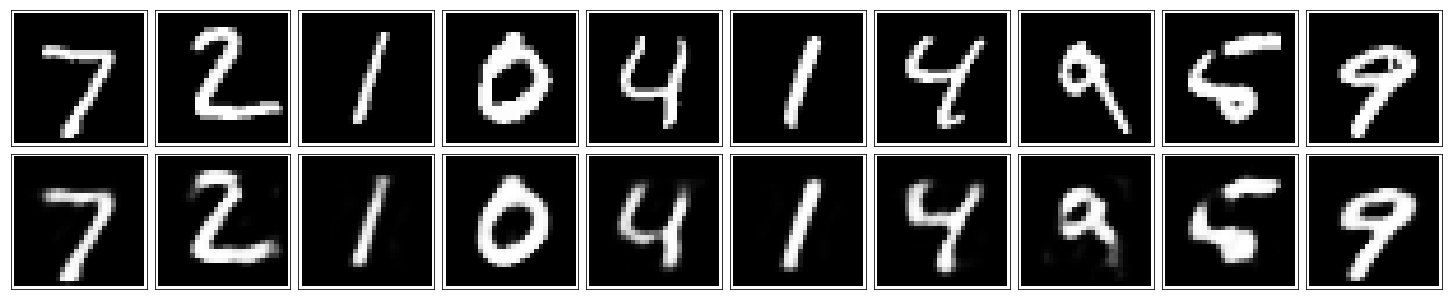

In [26]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [27]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.